In [29]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import _pickle as pkl
import seaborn as sns
import os 

if os.path.exists("./paper.mplstyle"):
    plt.style.use("./paper.mplstyle")
    print("Using paper style")
else:
    print("Using default style")

Using paper style


In [26]:
# values = [0.4, 0.8, 1.2, 2, 2.5]
# stiffness = {}
values = [0.05, 0.1, 0.25, 0.5]
p_apo_V  = {}

for v in values:
    df = pd.read_csv('./ScanPapoV_3_' + str(v))
    df = df.groupby(['time', 'cell_type']).size().reset_index(name='count')

    res = {}
    for c in [1, 2, 3]:
        time = df[df['cell_type'] == c]['time']
        count = df[df['cell_type'] == c]['count']
        res["Type"+str(c)] = {"time": time, "count": count}

    p_apo_V[v] = res

In [27]:
with open('../Results/scan_p_apo_3_V.pkl', 'wb') as f:
    pkl.dump(p_apo_V, f)

In [7]:
from pprint import pprint
pprint(volume_3)

{0.5: {'Type1': {'count': 0       140
3       140
6       140
9       140
12      140
       ... 
7798    890
7799    890
7800    889
7802    890
7804    890
Name: count, Length: 3000, dtype: int64,
                 'time': 0        -20.0
3        -19.0
6        -18.0
9        -17.0
12       -16.0
         ...  
7798    2975.0
7799    2976.0
7800    2977.0
7802    2978.0
7804    2979.0
Name: time, Length: 3000, dtype: float64},
       'Type2': {'count': 1       18
4       18
7       18
10      18
13      18
        ..
5342     1
5345     1
5348     1
5351     1
5354     1
Name: count, Length: 1593, dtype: int64,
                 'time': 1        -20.0
4        -19.0
7        -18.0
10       -17.0
13       -16.0
         ...  
5342    1568.0
5345    1569.0
5348    1570.0
5351    1571.0
5354    1572.0
Name: time, Length: 1593, dtype: float64},
       'Type3': {'count': 2       66
5       66
8       66
11      66
14      66
        ..
6928     1
6931     1
6934     1
6937     1
6940     1


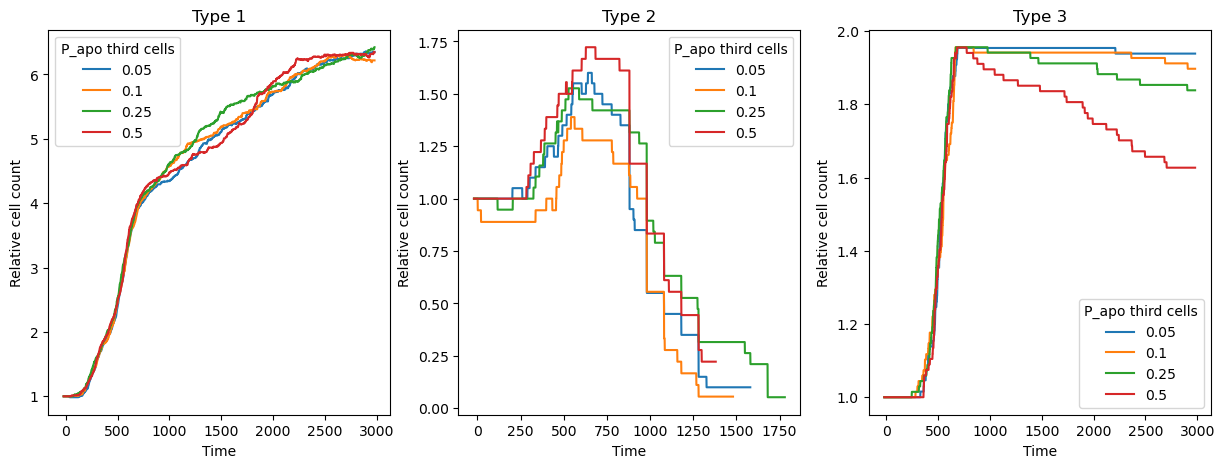

In [25]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
data = p_apo_V.copy()
data_legend = "P_apo third cells"

for v in data.keys():
    time = data[v]["Type1"]["time"]
    count = data[v]["Type1"]["count"]
    count = count / count.iloc[0]
    ax[0].plot(time, count, label=v)
    ax[0].set_title("Type 1")
    ax[0].legend(title=data_legend)
    ax[0].set_xlabel("Time")
    ax[0].set_ylabel("Relative cell count")

    time = data[v]["Type2"]["time"]
    count = data[v]["Type2"]["count"]
    count = count / count.iloc[0]
    ax[1].plot(time, count, label=v)
    ax[1].set_title("Type 2")
    ax[1].legend(title=data_legend)
    ax[1].set_xlabel("Time")
    ax[1].set_ylabel("Relative cell count")

    time = data[v]["Type3"]["time"]
    count = data[v]["Type3"]["count"]
    count = count / count.iloc[0]
    ax[2].plot(time, count, label=v)
    ax[2].set_title("Type 3")
    ax[2].legend(title=data_legend)
    ax[2].set_xlabel("Time")
    ax[2].set_ylabel("Relative cell count")



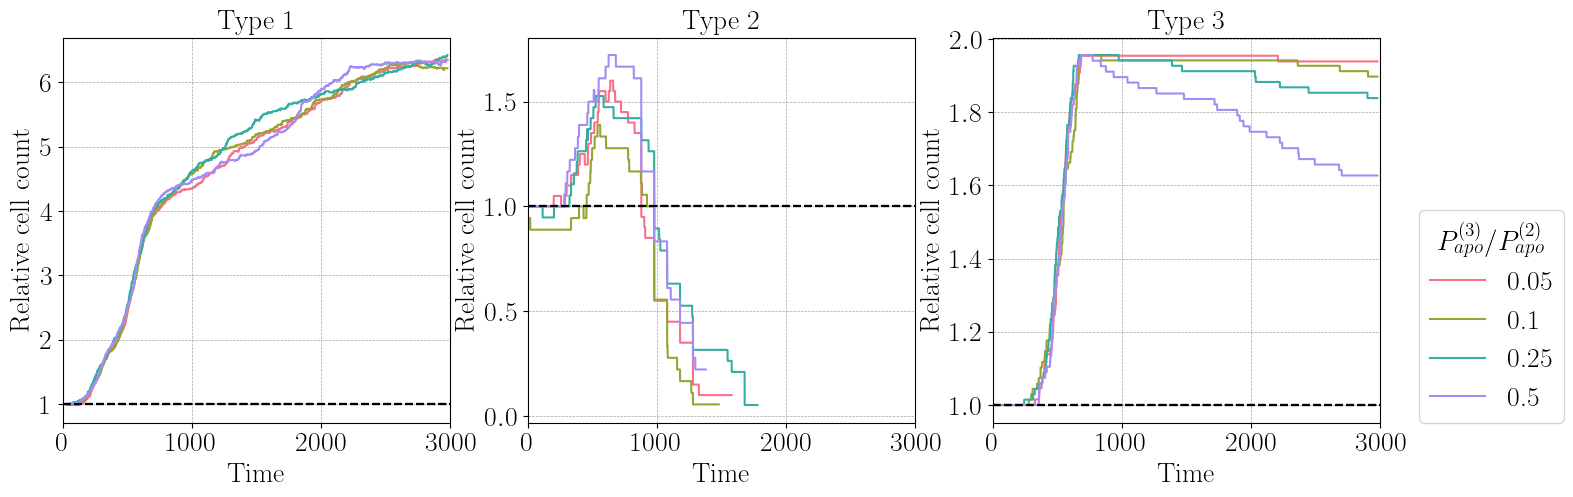

In [58]:
# When it's needed a plot with three cell types
with open('../Results/scan_p_apo_3_V.pkl', 'rb') as f:
    data = pkl.load(f)

fig, ax = plt.subplots(1, 3, figsize=(17, 5))
#fig.suptitle("Stiffness third cells", fontsize=23)

data_legend = r"$P_{apo}^{(3)}/P_{apo}^{(2)}$"

fontsize=20
colors = sns.color_palette("husl", len(data.keys()))

for i, v in enumerate(data.keys()):
    time = data[v]["Type1"]["time"]
    count = data[v]["Type1"]["count"]
    count = count / count.iloc[0]
    ax[0].plot(time, count, label=v, color=colors[i])
    ax[0].set_title("Type 1", fontsize=fontsize)
    ax[0].legend(title=data_legend)
    ax[0].set_xlabel("Time", fontsize=fontsize)
    ax[0].set_ylabel("Relative cell count", fontsize=fontsize)
    ax[0].set_xlim(0, 3000)
    ax[0].hlines(1, 0, 3000, "black", "--")
    ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax[0].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[0].tick_params(axis='both', which='minor', labelsize=fontsize)

    time = data[v]["Type2"]["time"]
    count = data[v]["Type2"]["count"]
    count = count / count.iloc[0]
    ax[1].plot(time, count, label=v, color=colors[i])
    ax[1].set_title("Type 2", fontsize=fontsize)
    ax[1].set_xlabel("Time", fontsize=fontsize)
    ax[1].set_ylabel("Relative cell count", fontsize=fontsize)
    ax[1].set_xlim(0, 3000)
    ax[1].hlines(1, 0, 3000, "black", "--")
    ax[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[1].tick_params(axis='both', which='minor', labelsize=fontsize)

    time = data[v]["Type3"]["time"]
    count = data[v]["Type3"]["count"]
    count = count / count.iloc[0]
    ax[2].plot(time, count, label=v, color=colors[i])
    ax[2].set_title("Type 3", fontsize=fontsize)
    ax[2].set_xlabel("Time", fontsize=fontsize)
    ax[2].set_ylabel("Relative cell count", fontsize=fontsize)
    ax[2].set_xlim(0, 3000)
    ax[2].hlines(1, 0, 3000, "black", "--")
    ax[2].grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax[2].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[2].tick_params(axis='both', which='minor', labelsize=fontsize)


ax[0].legend(title=data_legend, loc=[3.5, 0], ncols=1, 
             fontsize=fontsize, title_fontsize=fontsize)

In [57]:
fig.savefig("../Results/p_apo_3_V.png", dpi=300)

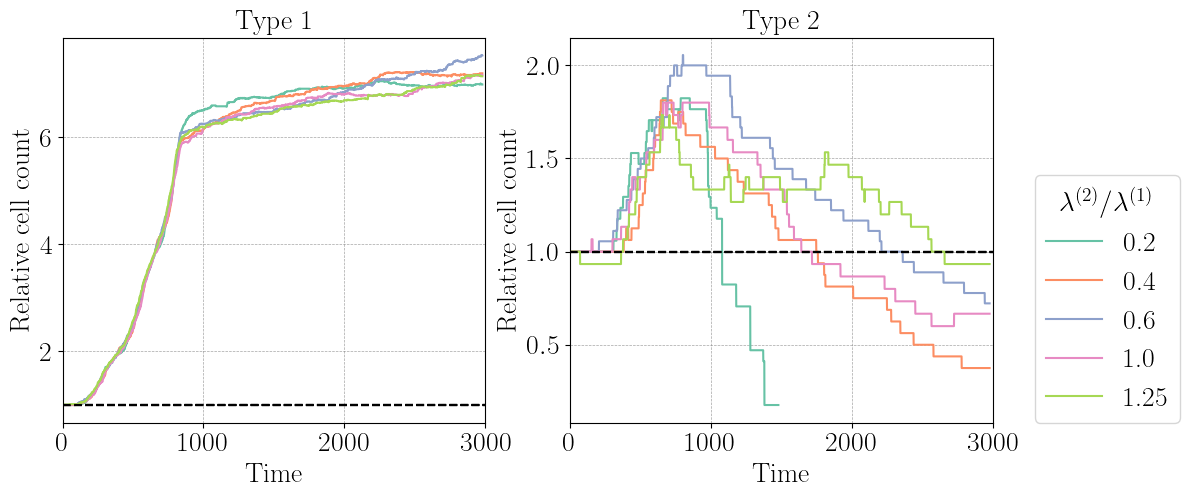

In [ ]:
# When it's needed a plot with two cell types
with open('../Results/ref_scan_stiffness_kd.pkl', 'rb') as f:
    data = pkl.load(f)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

data_legend = r"$\lambda^{(2)}$"

fontsize=20
colors = sns.color_palette("Set2", len(data.keys()))

for i, v in enumerate(data.keys()):
    time = data[v]["Type1"]["time"]
    count = data[v]["Type1"]["count"]
    count = count / count.iloc[0]
    ax[0].plot(time, count, label=v, color=colors[i])
    ax[0].set_title("Type 1", fontsize=fontsize)
    ax[0].legend(title=data_legend)
    ax[0].set_xlabel("Time", fontsize=fontsize)
    ax[0].set_ylabel("Relative cell count", fontsize=fontsize)
    ax[0].set_xlim(0, 3000)
    ax[0].hlines(1, 0, 3000, "black", "--")
    ax[0].grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax[0].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[0].tick_params(axis='both', which='minor', labelsize=fontsize)

    time = data[v]["Type2"]["time"]
    count = data[v]["Type2"]["count"]
    count = count / count.iloc[0]
    ax[1].plot(time, count, label=v, color=colors[i])
    ax[1].set_title("Type 2", fontsize=fontsize)
    ax[1].set_xlabel("Time", fontsize=fontsize)
    ax[1].set_ylabel("Relative cell count", fontsize=fontsize)
    ax[1].set_xlim(0, 3000)
    ax[1].hlines(1, 0, 3000, "black", "--")
    ax[1].grid(True, linestyle='--', linewidth=0.5, alpha=0.7, color='gray')
    ax[1].tick_params(axis='both', which='major', labelsize=fontsize)
    ax[1].tick_params(axis='both', which='minor', labelsize=fontsize)

ax[0].legend(title=data_legend, loc=[2.3, 0], ncols=1, 
             fontsize=fontsize, title_fontsize=fontsize)

In [70]:
fig.savefig("../Results/ref_stiffness.png", dpi=300)